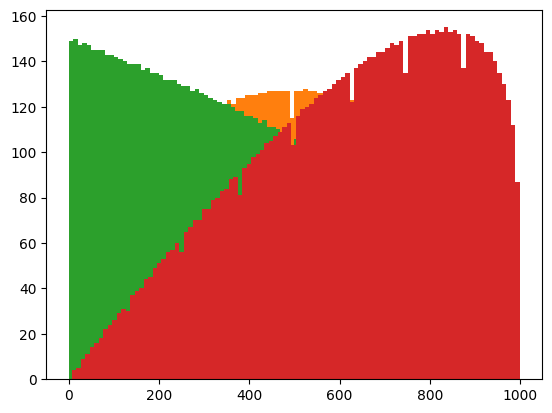

In [6]:
import argparse

import matplotlib.pyplot as plt
from loss import get_multirank_stratified_random_timesteps

_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=1.25, beta=1.25), bins=100)
_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=1.5, beta=1.5), bins=100)
_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=1, beta=1.5), bins=100)
_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=2, beta=1.2), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=1.2, beta=3), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(100000, device='cpu', alpha=1.2, beta=1.8), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(100000, device='cpu', alpha=1.1, beta=2), bins=100)

In [1]:
import random
import argparse
import logging

batch = {'captions': {'default': ['a cat', 'a dog'], 'variant1': ['a cute cat', None], 'variant2': [None, 'a big dog'], 'variant3': ['a small cat', 'a big dog']}}
args = argparse.Namespace(caption_variants=['variant1', '*'])

caption_candidates = []
available_non_default = [k for k in batch["captions"].keys() if k != "default"]

if args.caption_variants:
    available_requested = list(set(available_non_default).intersection(set(args.caption_variants)))
    if '*' in args.caption_variants:
        available_requested.append('*')

    if available_requested:
        requested_choice = random.choice(available_requested)
        print('requested_choice: ', requested_choice)
        if requested_choice == '*':
            caption_candidates = available_non_default
        else:
            caption_candidates = [requested_choice]
else:
    caption_candidates = available_non_default

if len(caption_candidates) == 0:
    caption_candidates.append("default")
    if "default" not in batch["captions"]:
        logging.info(f"surprise cond dropout: ** Apparently no captions: {batch.get('pathnames', '(no paths)')}: {batch['captions']}")
        batch["captions"]["default"] = [train_batch.cond_dropout_caption] * image_shape[0]
        batch["tokens"]["default"] = [train_batch.cond_dropout_tokens] * image_shape[0]
caption_variants = [random.choice(caption_candidates)]
print('picked caption variant: ', caption_variants)


requested_choice:  *
picked caption variant:  ['variant1']


In [4]:
from collections import Counter

counter = Counter([t.item() for t in timesteps])
[counter[i] for i in range(1000)]

NameError: name 'timesteps' is not defined